Para realizar uma clusterização dos dados do portal, optei por conhecer as variáveis. 
Criei esse dicionário para nortear meus passos:

https://docs.google.com/spreadsheets/d/1qlOUTgwieU1hbn3WhSukxO0r_PuD2AVbUMC0JOvjVOM/edit?usp=sharing




Importação de pacotes


In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import numpy as np
import pandas as pd
import os
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 
from sklearn.cluster import KMeans
from matplotlib.pyplot import xticks
from glob import glob
import csv

#Setando os dados
os.chdir()
os.listdir()




Populating the interactive namespace from numpy and matplotlib


In [2]:
#Consolidando as bases dos arquivos



def create_global_header(files):
    consolidated_header = ['filename']
    for file in files:
        with open(file, 'r') as icsv:
            reader = csv.DictReader(icsv, dialect = 'excel', delimiter=';')
            for field in reader.fieldnames:
                if field not in consolidated_header:
                    consolidated_header.append(field)
    return consolidated_header

def global_csv(ifile, global_header, ofile):

    with open(ofile, 'a' ) as ocsv, open(ifile, 'r') as icsv:
        ireader = csv.DictReader(icsv, dialect='excel', delimiter=';' )
        owriter = csv.DictWriter(ocsv, global_header, dialect='excel', delimiter=';')
        for i, row in enumerate(ireader):
            row['filename']= ifile
            owriter.writerow(row)


if __name__ == '__main__':
    files = glob('*.csv')
    global_header = create_global_header(files)
    with open("consolidated.csv", 'w') as mycsv:
        writer = csv.DictWriter(mycsv, global_header, dialect='excel', delimiter=';')
        writer.writeheader()
    for file in files:
        if file != 'consolidated.csv':
            global_csv(file, global_header, 'consolidated.csv')


In [3]:
#Abrindo os arquivos

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('', sep = ';',engine = 'python', encoding='latin1')
df.head()

,filename,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_COMPTC,TP_APLIC,TP_ATIVO,EMISSOR_LIGADO,TP_NEGOC,QT_VENDA_NEGOC,VL_VENDA_NEGOC,QT_AQUIS_NEGOC,VL_AQUIS_NEGOC,QT_POS_FINAL,VL_MERC_POS_FINAL,VL_CUSTO_POS_FINAL,DT_CONFID_APLIC,TP_TITPUB,CD_ISIN,CD_SELIC,DT_EMISSAO,DT_VENC,CNPJ_FUNDO_COTA,NM_FUNDO_COTA,CD_SWAP,DS_SWAP,CD_ATIVO,DS_ATIVO,DT_INI_VIGENCIA,DT_FIM_VIGENCIA,CNPJ_EMISSOR,EMISSOR,TITULO_POSFX,CD_INDEXADOR_POSFX,DS_INDEXADOR_POSFX,PR_INDEXADOR_POSFX,PR_CUPOM_POSFX,PR_TAXA_PREFX,RISCO_EMISSOR,AG_RISCO,DT_RISCO,GRAU_RISCO,PF_PJ_EMISSOR,CPF_CNPJ_EMISSOR,TITULO_CETIP,TITULO_GARANTIA,CNPJ_INSTITUICAO_FINANC_COOBR,INVEST_COLETIVO,INVEST_COLETIVO_GESTOR,CD_PAIS,PAIS,CD_BV_MERC,BV_MERC,CD_ATIVO_BV_MERC,DS_ATIVO_EXTERIOR,QT_ATIVO_EXTERIOR,VL_ATIVO_EXTERIOR
0,cda_fi_BLC_1_202112.csv,FAPI,02.010.153/0001-45,BB FAPI FUNDO DE APOSENTADORIA PROGRAMADA INDI...,2021-12-31,Operações Compromissadas,Título público federal,N,Para negociação,NaN,NaN,NaN,NaN,3242.0,2353628.12,NaN,NaN,LETRAS DO TESOURO NACIONAL,BRSTNCLTN7N2,100000.0,2018-02-01,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cda_fi_BLC_1_202112.csv,FAPI,02.010.153/0001-45,BB FAPI FUNDO DE APOSENTADORIA PROGRAMADA INDI...,2021-12-31,Títulos Públicos,Título público federal,NaN,Para negociação,0.0,0.0,0.0,0.0,500.0,405552.65,NaN,NaN,LETRAS DO TESOURO NACIONAL,BRSTNCLTN7S1,100000.0,2020-01-03,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cda_fi_BLC_1_202112.csv,FAPI,02.010.153/0001-45,BB FAPI FUNDO DE APOSENTADORIA PROGRAMADA INDI...,2021-12-31,Títulos Públicos,Título público federal,NaN,Para negociação,0.0,0.0,0.0,0.0,3735.0,3823829.28,NaN,NaN,NOTAS DO TESOURO NACIONAL - SERIE F,BRSTNCNTF1P8,950199.0,2016-01-15,2027-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cda_fi_BLC_1_202112.csv,FAPI,02.010.153/0001-45,BB FAPI FUNDO DE APOSENTADORIA PROGRAMADA INDI...,2021-12-31,Títulos Públicos,Título público federal,NaN,Para negociação,0.0,0.0,0.0,0.0,7550.0,7161655.06,NaN,NaN,LETRAS DO TESOURO NACIONAL,BRSTNCLTN7O0,100000.0,2018-06-21,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cda_fi_BLC_1_202112.csv,FAPI,02.010.153/0001-45,BB FAPI FUNDO DE APOSENTADORIA PROGRAMADA INDI...,2021-12-31,Títulos Públicos,Título público federal,NaN,Para negociação,0.0,0.0,0.0,0.0,7.0,26759.24,NaN,NaN,NOTAS DO TESOURO NACIONAL SERIE B,BRSTNCNTB4O9,760199.0,2014-01-15,2023-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explorando e tratando os dados


In [5]:
df.columns


Index(['filename', 'TP_FUNDO', 'CNPJ_FUNDO', 'DENOM_SOCIAL', 'DT_COMPTC',
       'TP_APLIC', 'TP_ATIVO', 'EMISSOR_LIGADO', 'TP_NEGOC', 'QT_VENDA_NEGOC',
       'VL_VENDA_NEGOC', 'QT_AQUIS_NEGOC', 'VL_AQUIS_NEGOC', 'QT_POS_FINAL',
       'VL_MERC_POS_FINAL', 'VL_CUSTO_POS_FINAL', 'DT_CONFID_APLIC',
       'TP_TITPUB', 'CD_ISIN', 'CD_SELIC', 'DT_EMISSAO', 'DT_VENC',
       'CNPJ_FUNDO_COTA', 'NM_FUNDO_COTA', 'CD_SWAP', 'DS_SWAP', 'CD_ATIVO',
       'DS_ATIVO', 'DT_INI_VIGENCIA', 'DT_FIM_VIGENCIA', 'CNPJ_EMISSOR',
       'EMISSOR', 'TITULO_POSFX', 'CD_INDEXADOR_POSFX', 'DS_INDEXADOR_POSFX',
       'PR_INDEXADOR_POSFX', 'PR_CUPOM_POSFX', 'PR_TAXA_PREFX',
       'RISCO_EMISSOR', 'AG_RISCO', 'DT_RISCO', 'GRAU_RISCO', 'PF_PJ_EMISSOR',
       'CPF_CNPJ_EMISSOR', 'TITULO_CETIP', 'TITULO_GARANTIA',
       'CNPJ_INSTITUICAO_FINANC_COOBR', 'INVEST_COLETIVO',
       'INVEST_COLETIVO_GESTOR', 'CD_PAIS', 'PAIS', 'CD_BV_MERC', 'BV_MERC',
       'CD_ATIVO_BV_MERC', 'DS_ATIVO_EXTERIOR', 'QT_ATIVO_EXTERI

In [6]:
df.dtypes

filename                          object
TP_FUNDO                          object
CNPJ_FUNDO                        object
DENOM_SOCIAL                      object
DT_COMPTC                         object
TP_APLIC                          object
TP_ATIVO                          object
EMISSOR_LIGADO                    object
TP_NEGOC                          object
QT_VENDA_NEGOC                   float64
VL_VENDA_NEGOC                   float64
QT_AQUIS_NEGOC                   float64
VL_AQUIS_NEGOC                   float64
QT_POS_FINAL                     float64
VL_MERC_POS_FINAL                float64
VL_CUSTO_POS_FINAL               float64
DT_CONFID_APLIC                   object
TP_TITPUB                         object
CD_ISIN                           object
CD_SELIC                         float64
DT_EMISSAO                        object
DT_VENC                           object
CNPJ_FUNDO_COTA                   object
NM_FUNDO_COTA                     object
CD_SWAP         

In [7]:
#Removendo duplicatas
df.drop_duplicates(keep='first', inplace=True) 



In [8]:
#Convertendo as colunas de acordo com o dicionário
df = pd.DataFrame(df)

datatypes_per_column = {
'AG_RISCO':'string',
'BV_MERC':'string',
'CD_ATIVO':'string',
'CD_ATIVO_BV_MERC':'string',
'CD_BV_MERC':'string',
'CD_INDEXADOR_POSFX':'string',
'CD_ISIN':'string',
'CD_PAIS':'string',
'CD_SELIC':'string',
'CD_SWAP':'string',
'CNPJ_EMISSOR':'string',
'CNPJ_FUNDO':'string',
'CNPJ_FUNDO_COTA':'string',
'CNPJ_INSTITUICAO_FINANC_COOBR':'string',
'CPF_CNPJ_EMISSOR':'string',
'DENOM_SOCIAL':'string',
'DS_ATIVO':'string',
'DS_ATIVO_EXTERIOR':'string',
'DS_INDEXADOR_POSFX':'string',
'DS_SWAP':'string',
'DT_COMPTC':'datetime64[ms]',
'DT_CONFID_APLIC':'datetime64[ms]',
'DT_EMISSAO':'datetime64[ms]',
'DT_FIM_VIGENCIA':'datetime64[ms]',
'DT_INI_VIGENCIA':'datetime64[ms]',
'DT_RISCO':'datetime64[ms]',
'DT_VENC':'datetime64[ms]',
'EMISSOR':'string',
'EMISSOR_LIGADO':'string',
'GRAU_RISCO':'float64',
'INVEST_COLETIVO':'float64',
'INVEST_COLETIVO_GESTOR':'float64',
'NM_FUNDO_COTA':'string',
'PAIS':'string',
'PF_PJ_EMISSOR':'string',
'PR_CUPOM_POSFX':'string',
'PR_INDEXADOR_POSFX':'string',
'PR_TAXA_PREFX':'string',
'QT_AQUIS_NEGOC':'float64',
'QT_ATIVO_EXTERIOR':'float64',
'QT_POS_FINAL':'float64',
'QT_VENDA_NEGOC':'float64',
'RISCO_EMISSOR':'string',
'TITULO_CETIP':'string',
'TITULO_GARANTIA':'string',
'TITULO_POSFX':'string',
'TP_APLIC':'string',
'TP_ATIVO':'string',
'TP_FUNDO':'string',
'TP_NEGOC':'string',
'TP_TITPUB':'string',
'VL_AQUIS_NEGOC':'float64',
'VL_ATIVO_EXTERIOR':'float64',
'VL_CUSTO_POS_FINAL':'float64',
'VL_MERC_POS_FINAL':'float64',
'VL_VENDA_NEGOC':'float64'}
  
df = df.astype(datatypes_per_column, errors = 'ignore')




In [9]:
#Ordenando as colunas por ordem alfabética
df.sort_index(axis=1, inplace=True)

In [10]:
df.describe()


,QT_AQUIS_NEGOC,QT_ATIVO_EXTERIOR,QT_POS_FINAL,QT_VENDA_NEGOC,VL_AQUIS_NEGOC,VL_ATIVO_EXTERIOR,VL_CUSTO_POS_FINAL,VL_MERC_POS_FINAL,VL_VENDA_NEGOC
count,1.631290e+05,8.347000e+03,3.157810e+05,1.632330e+05,1.631290e+05,8.347000e+03,2.400000e+02,3.841880e+05,1.632330e+05
mean,2.760227e+05,2.158231e+09,8.877306e+07,1.299621e+05,1.238700e+08,3.397926e+06,4.720104e+07,2.223515e+07,1.105871e+08
std,4.329191e+07,2.393196e+10,1.359894e+10,2.106113e+07,4.294555e+10,4.201530e+07,1.641145e+08,4.175363e+08,3.775859e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.533925e+08,0.000000e+00
25%,0.000000e+00,1.605000e+02,5.908259e+02,0.000000e+00,0.000000e+00,2.472490e+03,8.223996e+04,4.804665e+04,0.000000e+00
50%,0.000000e+00,3.570410e+05,1.000000e+04,0.000000e+00,0.000000e+00,6.608540e+04,1.824004e+06,5.314640e+05,0.000000e+00
75%,0.000000e+00,3.217207e+07,2.809557e+05,0.000000e+00,0.000000e+00,6.314355e+05,1.108135e+07,2.542479e+06,0.000000e+00
max,1.436679e+10,8.880000e+11,7.279377e+12,6.781736e+09,1.717049e+13,3.115310e+09,1.231195e+09,1.350000e+11,1.504747e+13


In [11]:
# Checando os valores null
df.isnull().sum()*100/df.shape[0]


AG_RISCO                         98.675648
BV_MERC                          96.738576
CD_ATIVO                         82.838090
CD_ATIVO_BV_MERC                 96.738576
CD_BV_MERC                       96.738576
CD_INDEXADOR_POSFX               91.779806
CD_ISIN                          75.390694
CD_PAIS                          96.738576
CD_SELIC                         92.508876
CD_SWAP                          99.951586
CNPJ_EMISSOR                     93.996429
CNPJ_FUNDO                        0.000000
CNPJ_FUNDO_COTA                  62.748706
CNPJ_INSTITUICAO_FINANC_COOBR    99.998438
CPF_CNPJ_EMISSOR                 92.400856
DENOM_SOCIAL                      0.014836
DS_ATIVO                         56.594167
DS_ATIVO_EXTERIOR                97.827366
DS_INDEXADOR_POSFX               91.779806
DS_SWAP                          99.951586
DT_COMPTC                         0.000000
DT_CONFID_APLIC                  99.163691
DT_EMISSAO                       92.508876
DT_FIM_VIGE

In [12]:
#Devido aos inúmeros dados faltantes, optei por excluir as colunas com esta deficiencia.
#Não valeria a pena rodar modelo para preencher esses valores categóricos quando a quantidade em falta é tão alta
df.dropna(axis=1, inplace=True)

df.head()

,CNPJ_FUNDO,DT_COMPTC,TP_APLIC,TP_ATIVO,TP_FUNDO,VL_MERC_POS_FINAL,filename
0,02.010.153/0001-45,2021-12-31,Operações Compromissadas,Título público federal,FAPI,2353628.12,cda_fi_BLC_1_202112.csv
1,02.010.153/0001-45,2021-12-31,Títulos Públicos,Título público federal,FAPI,405552.65,cda_fi_BLC_1_202112.csv
2,02.010.153/0001-45,2021-12-31,Títulos Públicos,Título público federal,FAPI,3823829.28,cda_fi_BLC_1_202112.csv
3,02.010.153/0001-45,2021-12-31,Títulos Públicos,Título público federal,FAPI,7161655.06,cda_fi_BLC_1_202112.csv
4,02.010.153/0001-45,2021-12-31,Títulos Públicos,Título público federal,FAPI,26759.24,cda_fi_BLC_1_202112.csv


In [13]:
#Apagando as colunas que não irei utilizar

df.drop(columns=["filename", "CNPJ_FUNDO","DT_COMPTC"],inplace=True)
df.head()

,TP_APLIC,TP_ATIVO,TP_FUNDO,VL_MERC_POS_FINAL
0,Operações Compromissadas,Título público federal,FAPI,2353628.12
1,Títulos Públicos,Título público federal,FAPI,405552.65
2,Títulos Públicos,Título público federal,FAPI,3823829.28
3,Títulos Públicos,Título público federal,FAPI,7161655.06
4,Títulos Públicos,Título público federal,FAPI,26759.24


In [14]:
#Verificando quais termos mais aparecem em cada coluna
TP_fundo = df.TP_FUNDO
TP_fundo_contador = TP_fundo.value_counts()
print(TP_fundo_contador)

FI             381315
FIP              1605
FAPI              436
FMP-FGTS          407
FMP-FGTS CL       383
FMAI               28
FIF                 8
FACFIF              6
Name: TP_FUNDO, dtype: Int64


In [15]:
#Criando um subgrupo para melhorar o desempenho do modelo
df["TP_FUNDO"] = df["TP_FUNDO"].map({
    "FI":"FI",
    "FIP":"FIP",
    "FAPI":"FAPI",
    "FMP-FGTS": "FMP-FGTS",
    "FMP-FGTS CL": "FMP-FGTS",
    "FMAI": "Outros",
    "FIF": "Outros",
    "FACFIF": "Outros"})


df["TP_FUNDO"].value_counts()



FI          381315
FIP           1605
FMP-FGTS       790
FAPI           436
Outros          42
Name: TP_FUNDO, dtype: int64

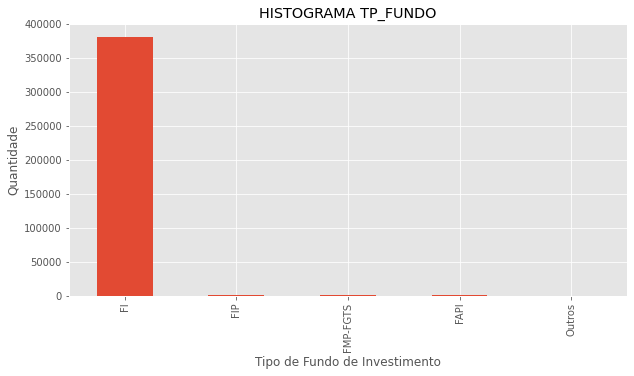

In [16]:
#Histograma da coluna TP_FUNDO

df.TP_FUNDO.value_counts().nlargest(5).plot(kind='bar', figsize=(10,5))
plt.title("HISTOGRAMA TP_FUNDO")
plt.ylabel('Quantidade')
plt.xlabel('Tipo de Fundo de Investimento');

In [17]:
#Verificando quais termos mais aparecem 
TP_Aplic = df.TP_APLIC
TP_fundo_aplic_contador = TP_Aplic.value_counts()
TP_fundo_aplic_contador.sort_index()

Ações                                                                      34340
Ações e outros TVM cedidos em empréstimo                                    2755
Brazilian Depository Receipt - BDR                                          2435
Certificado ou recibo de depósito de valores mobiliários                    2414
Compras a termo a receber                                                    589
Cotas de Fundos                                                           143064
Cotas de fundos de investimento - Instrução Nº 409                            45
Cotas de fundos de renda fixa                                                  4
Cotas de fundos de renda variável                                              7
DIFERENCIAL DE SWAP A PAGAR                                                   98
DIFERENCIAL DE SWAP A RECEBER                                                 88
DISPONÍVEL DE OURO                                                             9
Debêntures                  

In [18]:
df["TP_APLIC"] = df["TP_APLIC"].map({
    "Ações": "Ações",
    "Ações e outros TVM cedidos em empréstimo": "Ações",
    "Brazilian Depository Receipt - BDR": "Ações",
    "Certificado ou recibo de depósito de valores mobiliários": "Ações",
    "Compras a termo a receber": "Operações a termo",
    "Cotas de Fundos": "Cotas",
    'Cotas de fundos de investimento - Instrução Nº 409':"Cotas",
    'Cotas de fundos de renda fixa': "Cotas",
    'Cotas de fundos de renda variável': 'Cotas',
    'DIFERENCIAL DE SWAP A PAGAR': 'SWAP',
    'DIFERENCIAL DE SWAP A RECEBER': 'SWAP',
    'DISPONÍVEL DE OURO': 'Ouro',
    'Debêntures': 'Debêntures',
    'Debêntures conversíveis': 'Debêntures',
    'Debêntures simples': 'Debêntures',
    'Depósitos a prazo e outros títulos de IF': 'Depósitos a prazo',
    'Disponibilidades': 'Disponibilidades',
    'Investimento no Exterior': 'Investimento no Exterior',
    'Mercado Futuro - Posições compradas': 'Mercado Futuro',
    'Mercado Futuro - Posições vendidas': 'Mercado Futuro',
    'Obrigações por ações e outros TVM recebidos em empréstimo': 'Mercado a termo',
    'Obrigações por compra a termo a pagar': 'Mercado a termo',
    'Obrigações por venda a termo a entregar': 'Mercado a termo',
    'Operações Compromissadas': 'Operações Compromissadas',
    'Opções - Posições lançadas': 'Opções',
    'Opções - Posições titulares': 'Opções',
    'Outras aplicações': 'Outros',
    'Outras operações passivas e exigibilidades': 'Outros',
    'Outros valores mobiliários ofertados privadamente': 'Outros',
    'Outros valores mobiliários registrados na CVM objeto de oferta pública': 'Outros',
    'Títulos Públicos': 'Títulos Públicos',
    'Títulos de Crédito Privado': 'Títulos de Crédito Privado',
    'Títulos ligados ao agronegócio': 'Títulos ligados ao agronegócio',
    'Valores a pagar': 'Valores a pagar',
    'Valores a receber':'Valores a receber',
    'Vendas a termo a receber': 'Outros' 
    
    
    })

df["TP_APLIC"].value_counts()

Cotas                             143120
Ações                              41944
Debêntures                         33281
Valores a pagar                    28209
Títulos Públicos                   23787
Depósitos a prazo                  23065
Valores a receber                  20515
Disponibilidades                   16787
Opções                             16215
Investimento no Exterior           12530
Outros                              7134
Mercado Futuro                      6317
Operações Compromissadas            5036
Mercado a termo                     3686
Títulos de Crédito Privado          1427
Operações a termo                    589
Títulos ligados ao agronegócio       351
SWAP                                 186
Ouro                                   9
Name: TP_APLIC, dtype: int64

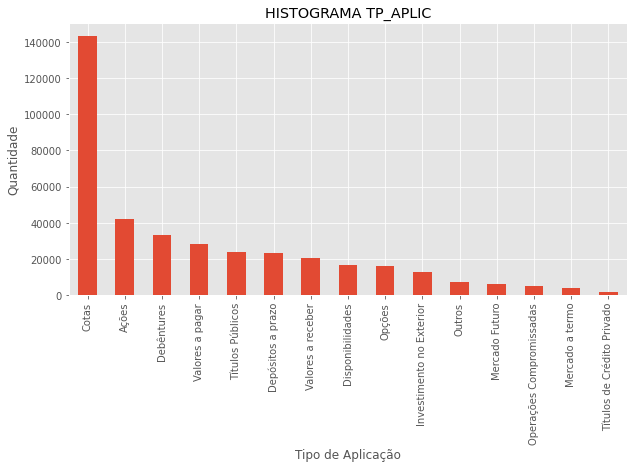

In [19]:
#Histograma da coluna TP_APLIC

df.TP_APLIC.value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("HISTOGRAMA TP_APLIC")
plt.ylabel('Quantidade')
plt.xlabel('Tipo de Aplicação');

In [20]:
#Verificando quais termos mais aparecem na coluna
TP_fundo = df.TP_ATIVO
TP_fundo_ativo_contador = TP_fundo.value_counts()
TP_fundo_ativo_contador.sort_index()	


Ação ordinária                                            33371
Ação ou recibo de ação do Mercosul                            2
Ação preferencial                                          8475
BDR de ETF                                                   88
BDR não patrocinado                                         886
BDR nível I                                                1206
BDR nível III                                               263
Bonds e Treasury                                            657
Bônus de subscrição                                          66
CCB                                                         587
CCCB                                                         12
CCI                                                         305
CDB/ RDB                                                   3055
CDCA                                                          1
CPR                                                           6
CRA                                     

In [21]:
df["TP_ATIVO"] = df["TP_ATIVO"].map({
'Ação ordinária'	:'Ação',
'Ação ou recibo de ação do Mercosul'	:'Ação',
'Ação preferencial'	:'Ação',
'BDR de ETF'	:'Ação',
'BDR não patrocinado'	:'Ação',
'BDR nível I'	:'Ação',
'BDR nível III'	:'Ação',
'Bônus de subscrição'	:'Ação',
'Certificado de depósito de ações'	:'Ação',
'Recibo de depósito de ações'	:'Ação',
'Recibo de subscrição'	:'Ação',
'CCB'	:'Certificados de Recebíveis',
'CCCB'	:'Certificados de Recebíveis',
'CCI'	:'Certificados de Recebíveis',
'CDB/ RDB'	:'Certificados de Recebíveis',
'Certificado de recebíveis imobiliários'	:'Certificados de Recebíveis',
'CPR'	:'Certificados de Recebíveis',
'CRA'	:'Certificados de Recebíveis',
'Cotas de fundos'	:'Cotas de Fundos',
'FIDC'	:'Cotas de Fundos',
'Debênture Conversível Permutável'	:'Debêntures',
'Debênture conversível'	:'Debêntures',
'Debênture Permutável'	:'Debêntures',
'Debênture simples'	:'Debêntures',
'FI Imobiliário'	:'FI Imobiliário',
'FI Participações'	:'FI Participações',
'Fundo de Investimento e de Cotas'	:'Fundo de Investimento e de Cotas',
'Fundos de Índice'	:'Fundos de Índice',
'Contrato Futuro'	:'Futuro',
'Futuro de BGI:Boi gordo'	:'Futuro',
'Futuro de BRI:IBrX-50'	:'Futuro',
'Futuro de DAP:Cupom de DI x IPCA'	:'Futuro',
'Futuro de DDI:Cupom cambial'	:'Futuro',
'Futuro de DI1:DI de 1 dia'	:'Futuro',
'Futuro de DOL:Dólar comercial'	:'Futuro',
'Futuro de EUR:Euro'	:'Futuro',
'Futuro de ICF:Café arábica'	:'Futuro',
'Futuro de IND:Ibovespa'	:'Futuro',
'Futuro de T10:US T-Note 10 anos'	:'Futuro',
'Futuro de WDL:Dólar comercial futuro'	:'Futuro',
'Futuro de WIN:Ibovespa futuro'	:'Futuro',
'Letra de Câmbio/ Letra Hipotecária/ Letra Imobiliária'	:'Letras Financeiras',
'Letra Financeira'	:'Letras Financeiras',
'Opção de compra'	:'Opções',
'Opção de venda'	:'Opções',
'DPGE'	:'Outros',
'NCA'	:'Outros',
'Nota Promissória/ Commercial Paper/ Export Note'	:'Outros',
'Outros instrumentos derivativos'	:'Outros',
'Outros'	:'Outros',
'SWAP'	:'SWAP',
'CDCA'	:'Outros',
'Título da Dívida Externa'	:'Título Público',
'Título público federal'	:'Título Público',
'Título Público'	:'Título Público',
'Bonds e Treasury'	:'Títulos externos',
'Depository Receipt no Exterior(DR)':	'Títulos externos',
'Fundos Offshore'	:'Títulos externos'


      })

df["TP_ATIVO"].value_counts()


Fundo de Investimento e de Cotas    125207
Outros                               75603
Ação                                 47486
Debêntures                           33295
Título Público                       28894
Letras Financeiras                   18142
Opções                               16423
Títulos externos                      9924
Cotas de Fundos                       9717
Futuro                                6275
Certificados de Recebíveis            4835
FI Participações                      4089
FI Imobiliário                        2572
Fundos de Índice                      1537
SWAP                                   189
Name: TP_ATIVO, dtype: int64

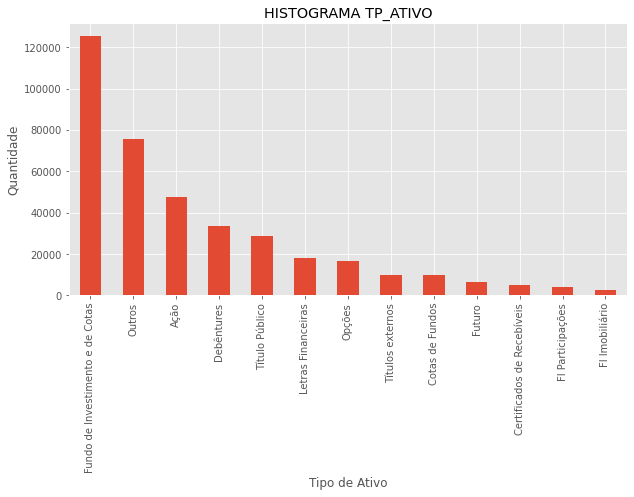

In [22]:
#Histograma da coluna TP_ATIVO

df.TP_ATIVO.value_counts().nlargest(13).plot(kind='bar', figsize=(10,5))
plt.title("HISTOGRAMA TP_ATIVO")
plt.ylabel('Quantidade')
plt.xlabel('Tipo de Ativo');

In [23]:
#Criando cópia do DF original
copia_df = df.copy()


In [24]:
copia_df

,TP_APLIC,TP_ATIVO,TP_FUNDO,VL_MERC_POS_FINAL
0,Operações Compromissadas,Título Público,FAPI,2353628.12
1,Títulos Públicos,Título Público,FAPI,405552.65
2,Títulos Públicos,Título Público,FAPI,3823829.28
3,Títulos Públicos,Título Público,FAPI,7161655.06
4,Títulos Públicos,Título Público,FAPI,26759.24
...,...,...,...,...
384183,Valores a pagar,Outros,FMP-FGTS,4786.58
384184,Valores a receber,Outros,FMP-FGTS,1088.77
384185,Disponibilidades,Outros,FMP-FGTS,33010.53
384186,Valores a pagar,Outros,FMP-FGTS,9521.77


In [25]:
#Preparando os dados categóricos e os transformando
le = preprocessing.LabelEncoder()
copia_df = copia_df.apply(le.fit_transform)
copia_df.head()


,TP_APLIC,TP_ATIVO,TP_FUNDO,VL_MERC_POS_FINAL
0,8,13,0,223964
1,14,13,0,123944
2,14,13,0,245756
3,14,13,0,267554
4,14,13,0,48003


In [26]:
#Normalizando os dados contínuos
copia_df['VL_MERC_POS_FINAL'] = copia_df['VL_MERC_POS_FINAL'].values.reshape(-1, 1)
copia_df['VL_MERC_POS_FINAL'] = preprocessing.StandardScaler().fit_transform(copia_df['VL_MERC_POS_FINAL'].values.reshape(-1, 1)) 
copia_df['VL_MERC_POS_FINAL']


0         0.823484
1        -0.212227
2         1.049141
3         1.274860
4        -0.998600
            ...   
384183   -1.253748
384184   -1.364050
384185   -0.964262
384186   -1.163908
384187   -1.298927
Name: VL_MERC_POS_FINAL, Length: 384188, dtype: float64

In [27]:
#Verificando os outliers da coluna VL_MERC_POS_FINAL
print(copia_df.sort_values('VL_MERC_POS_FINAL', ascending=False).head(5)['VL_MERC_POS_FINAL'])
print(copia_df.sort_values('VL_MERC_POS_FINAL', ascending=True).head(5)['VL_MERC_POS_FINAL'])
copia_df.VL_MERC_POS_FINAL.mean()

549      1.822041
31531    1.822031
18565    1.822020
35949    1.822010
18562    1.822000
Name: VL_MERC_POS_FINAL, dtype: float64
290384   -1.495673
293214   -1.495662
290381   -1.495652
272121   -1.495642
272123   -1.495631
Name: VL_MERC_POS_FINAL, dtype: float64


-1.92431402299757e-14

In [28]:
#Tirando os outliers da coluna VL_MERC_POS_FINAL
copia_df.loc[copia_df['VL_MERC_POS_FINAL']==1.822041, 'VL_MERC_POS_FINAL'] = -1.92431402299757



,TP_APLIC,TP_ATIVO,TP_FUNDO,VL_MERC_POS_FINAL
TP_APLIC,1.000000,0.685777,0.035244,-0.300856
TP_ATIVO,0.685777,1.000000,0.006691,-0.150691
TP_FUNDO,0.035244,0.006691,1.000000,-0.029739
VL_MERC_POS_FINAL,-0.300856,-0.150691,-0.029739,1.000000


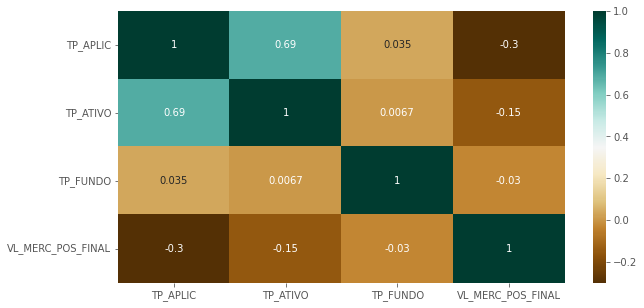

In [29]:
#Verificando a correlação dos dados

plt.figure(figsize=(10,5))
c= copia_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

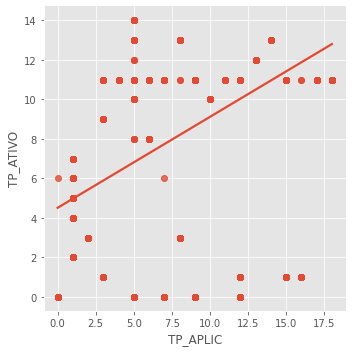

In [30]:
sns.lmplot(x = 'TP_APLIC', y = 'TP_ATIVO', data = copia_df)

#Resultado indica uma correlação moderada

In [31]:
#Verificando os quartis do df
Q1 = copia_df.quantile(0.25)
Q3 = copia_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TP_APLIC             9.000000
TP_ATIVO             7.000000
TP_FUNDO             0.000000
VL_MERC_POS_FINAL    1.760549
dtype: float64


# Clusterizando

In [33]:
#Descobrindo o numero de clusters
#!pip install kmodes

from kmodes.kmodes import KModes

cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1, max_iter = 50, random_state = 0)
    kmode.fit_predict(copia_df)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 0, cost: 882267.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 0, cost: 778313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 42, cost: 688887.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 67, cost: 622311.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 85, cost: 569630.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 85, cost: 530353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 44, cost: 497720.0


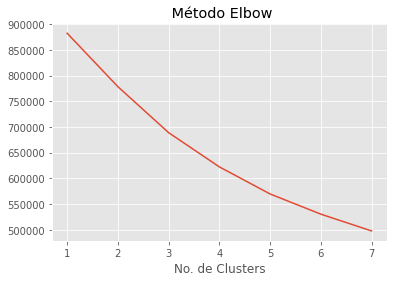

In [34]:
from kmodes.kmodes import KModes

y = np.array([i for i in range(1,8,1)])

plt.title(' Método Elbow')
plt.xlabel('No. de Clusters')
plt.plot(y,cost)

##K=4


In [47]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(copia_df)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 67, cost: 1006495.0


In [48]:
# Clusters Previstas
fitClusters_cao


array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [59]:
#Combinando o cluster previsto com o dataset original
copia_df = df.reset_index()


In [60]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['Cluster Previsto']
combinedDf = pd.concat([copia_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)


In [53]:
combinedDf


,TP_APLIC,TP_ATIVO,TP_FUNDO,VL_MERC_POS_FINAL,cluster_predicted
0,Operações Compromissadas,Título Público,FAPI,2353628.12,0
1,Títulos Públicos,Título Público,FAPI,405552.65,0
2,Títulos Públicos,Título Público,FAPI,3823829.28,0
3,Títulos Públicos,Título Público,FAPI,7161655.06,0
4,Títulos Públicos,Título Público,FAPI,26759.24,0
...,...,...,...,...,...
384183,Valores a pagar,Outros,FMP-FGTS,4786.58,1
384184,Valores a receber,Outros,FMP-FGTS,1088.77,1
384185,Disponibilidades,Outros,FMP-FGTS,33010.53,1
384186,Valores a pagar,Outros,FMP-FGTS,9521.77,1


In [61]:
cluster_0 = combinedDf[combinedDf['Cluster Previsto'] == 0]
cluster_1 = combinedDf[combinedDf['Cluster Previsto'] == 1]
cluster_2 = combinedDf[combinedDf['Cluster Previsto'] == 2]
cluster_3 = combinedDf[combinedDf['Cluster Previsto'] == 3]


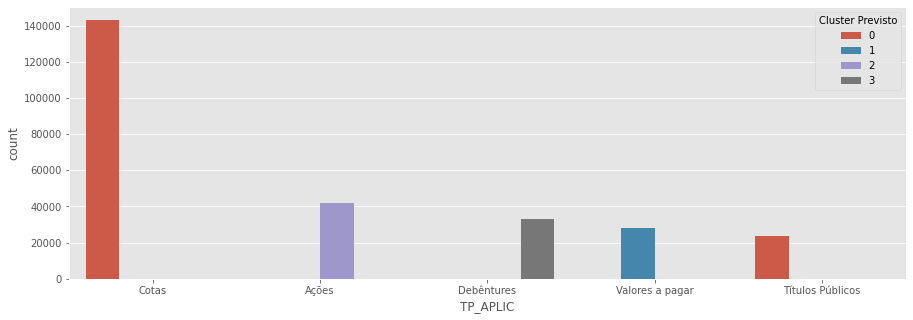

In [63]:
#Visualizando os clusters nos 5 primeiros tipos de aplicações
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['TP_APLIC'],order=combinedDf['TP_APLIC'].value_counts().nlargest(5).index,hue=combinedDf['Cluster Previsto'])
plt.show()

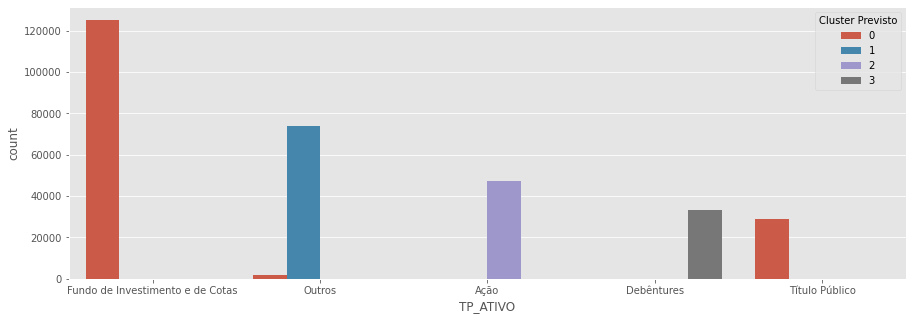

In [65]:
#Visualizando os clusters nos 5 primeiros tipos de ativos
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['TP_ATIVO'],order=combinedDf['TP_ATIVO'].value_counts().nlargest(5).index,hue=combinedDf['Cluster Previsto'])
plt.show()

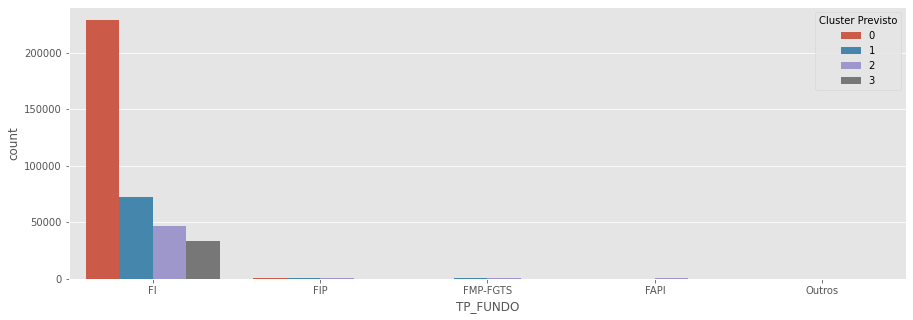

In [66]:
#Visualizando os clusters nos 5 primeiros tipos de de fundos
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['TP_FUNDO'],order=combinedDf['TP_FUNDO'].value_counts().nlargest(5).index,hue=combinedDf['Cluster Previsto'])
plt.show()

In [69]:
#Exportando o dataframe
combinedDf.to_csv('CLusterizacao_FI.csv', encoding='utf-8', sep=';')
